  # Machine Learning Final Lab/CAC3

  <hr/>

  Submitted by <br>
  Name: **Sandeep Jabez** <br>
  Register Number: **20112029** <br>
  Class: **4BScDS** <br> 
  <hr/>








## Lab Overview  
### Objectives
• Find out a Dataset, and compare at least two different algorithms and choose the best one

• Use suitable Data Preprocessing and Feature Selection/Engineering Methods

• Fine tune the model and hyper parameters and Finalise the Model

• Make the model deployment-ready by giving User-Input provision

## Approach
My approach to this is to find a dataset first and do some preprocessing. Then I will try to find if there are any missing datasets. For the two different algorithms I am going to use Logistic Regression and Support Vector Machine. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# import SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# import encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv('airline.csv')

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.shape

(129880, 23)

In [6]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

EDA


In [7]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


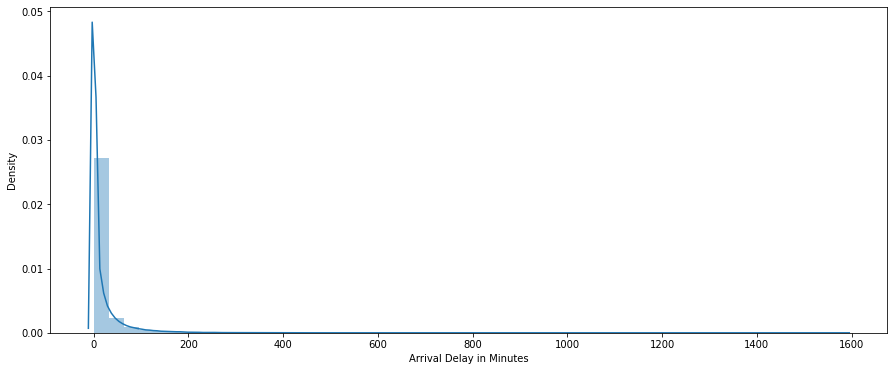

In [8]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()

C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


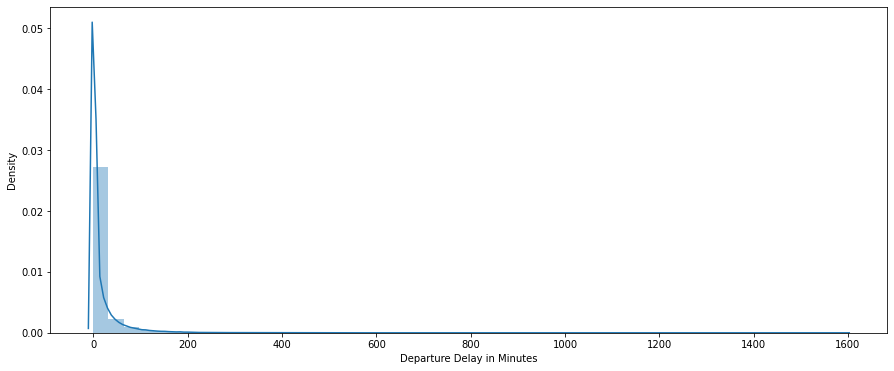

In [9]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Departure Delay in Minutes']); 
plt.show()

<AxesSubplot:>

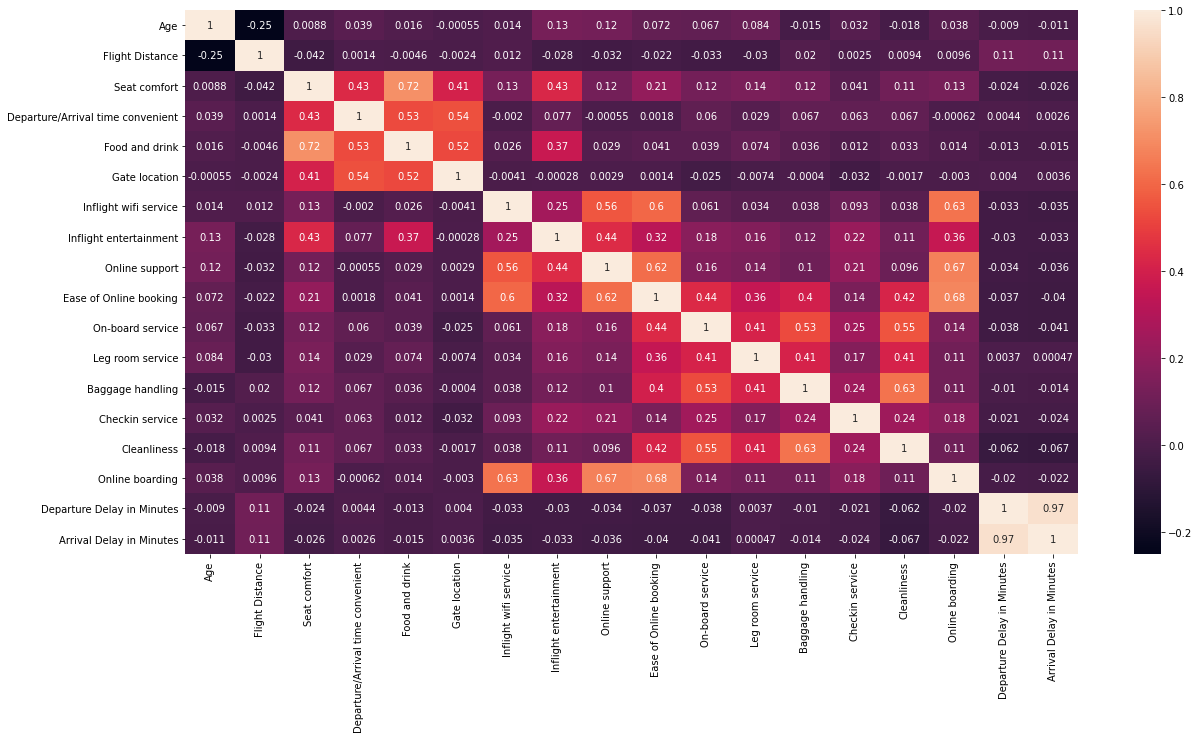

In [10]:
#heatmap
# increase size
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(),annot=True)


We will do Encoding

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [12]:
# label encoding

col=df.columns
for i in col:
    if df[i].dtype=='object':
        lbl=LabelEncoder()
        df[i]=lbl.fit_transform(df[i])


In [13]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,0.0,65.0,1.0,1.0,265.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,1.0,1.0,0.0,47.0,1.0,0.0,2464.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,1.0,0.0,0.0,15.0,1.0,1.0,2138.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,1.0,0.0,0.0,60.0,1.0,1.0,623.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,1.0,0.0,0.0,70.0,1.0,1.0,354.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,0.0,1.0,29.0,1.0,1.0,1731.0,5.0,5.0,5.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
129876,0.0,1.0,1.0,63.0,1.0,0.0,2087.0,2.0,3.0,2.0,...,1.0,3.0,2.0,3.0,3.0,1.0,2.0,1.0,174.0,172.0
129877,0.0,1.0,1.0,69.0,1.0,1.0,2320.0,3.0,0.0,3.0,...,2.0,4.0,4.0,3.0,4.0,2.0,3.0,2.0,155.0,163.0
129878,0.0,1.0,1.0,66.0,1.0,1.0,2450.0,3.0,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,193.0,205.0


In [14]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Splitting dataset into features and target

In [15]:
features=df.drop(['satisfaction'] , axis=1)
target = df.satisfaction

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=10)


In [17]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# print accuracy
print('Accuracy of logistic regression classifier on training set:')
print(logreg.score(X_train, y_train))
classs=classification_report(y_train,logreg.predict(X_train))
print(classs)

Accuracy of logistic regression classifier on training set:
0.7434471680336098
              precision    recall  f1-score   support

           0       0.75      0.65      0.70     29298
           1       0.74      0.82      0.78     35445

    accuracy                           0.74     64743
   macro avg       0.74      0.74      0.74     64743
weighted avg       0.74      0.74      0.74     64743



In [28]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of SVM classifier on test set:')
print(clf.score(X_test, y_test))
classs=classification_report(y_test,y_pred)
print(classs)


Accuracy of SVM classifier on test set:
0.9863871494690988
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5421
           1       0.99      0.98      0.99      5598

    accuracy                           0.99     11019
   macro avg       0.99      0.99      0.99     11019
weighted avg       0.99      0.99      0.99     11019



In [20]:
# We will try applying PCA for dimensionality reduction

pca = PCA(n_components=4)
pca.fit(features)
pca_array=pca.transform(features)
pca_df=pd.DataFrame(pca_array)
pca_df.head()


,0,1,2,3
0,-1716.184675,-10.882516,19.260968,-0.086998
1,485.371715,411.027824,7.113002,-6.795347
2,156.954372,-22.065396,-23.824747,-0.270541
3,-1358.174797,-12.990296,15.581958,-0.074619
4,-1627.205109,-11.373975,24.600851,-0.046582


In [21]:
pca_df['y']=df.satisfaction
pca_df.head()

,0,1,2,3,y
0,-1716.184675,-10.882516,19.260968,-0.086998,1.0
1,485.371715,411.027824,7.113002,-6.795347,1.0
2,156.954372,-22.065396,-23.824747,-0.270541,1.0
3,-1358.174797,-12.990296,15.581958,-0.074619,1.0
4,-1627.205109,-11.373975,24.600851,-0.046582,1.0


<AxesSubplot:xlabel='0', ylabel='1'>

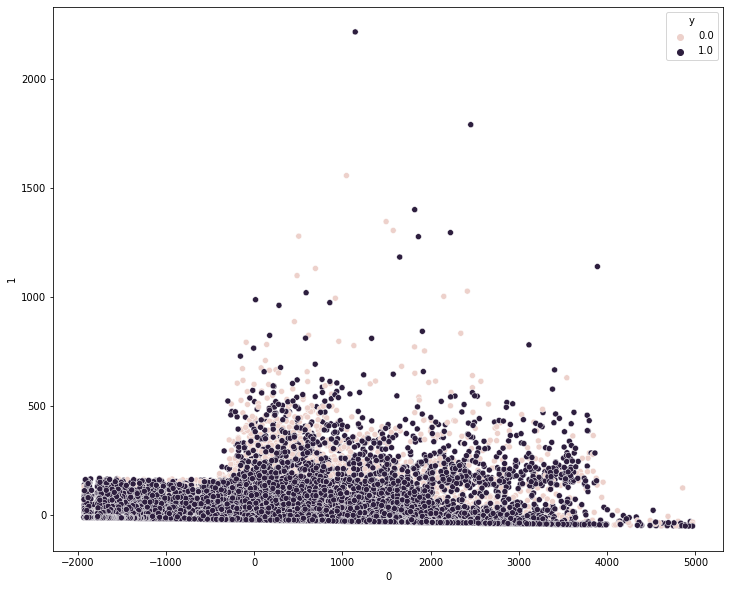

In [24]:
# scatter plot of the data
plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df)


In [26]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(pca_df)

,0,1,2,3,y
0,-1716.184675,-10.882516,19.260968,-0.086998,1.0
1,485.371715,411.027824,7.113002,-6.795347,1.0
2,156.954372,-22.065396,-23.824747,-0.270541,1.0
3,-1358.174797,-12.990296,15.581958,-0.074619,1.0
4,-1627.205109,-11.373975,24.600851,-0.046582,1.0
...,...,...,...,...,...
129482,-250.087822,-19.625356,-11.255161,-0.243325,1.0
129483,107.209822,223.130017,22.681488,-3.192583,1.0
129484,340.066187,202.050100,29.634612,4.054547,1.0
129485,470.404940,257.866920,26.790707,6.470970,1.0


In [ ]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(pca_df, y_train)
y_pred2=clf2.predict(pca_df)
print('Accuracy of SVM classifier on test set:')
print(clf2.score(pca_df, y_test))
classs=classification_report(y_test,y_pred2)
print(classs)

